In [194]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
nlp = spacy.load('fr_core_news_md')

In [216]:
#read emails
emails= pd.read_excel('emails_labled_fr.xlsx')
emails.columns

Index(['hasAttachments', 'sender name', 'subject', 'body',
       'sender email domain', 'language', 'category'],
      dtype='object')

In [217]:
emails['category'].value_counts()

formation    226
scolarité     73
sport         33
événement     31
autre         10
Name: category, dtype: int64

In [218]:
#concatenate body with subject
emails["text"] = emails['subject'].map(str) +" "+ emails['body'].map(str)

In [219]:
emails= emails[emails['category'] != "autre"]

In [233]:
#prepare data for vectorization
emails_p= emails[['text']]
emails_p['acual category']= emails['category']
emails_p['is_target']= 0

#vocabulary
evenment_vocab= "soirée conférence congrés internationale séminaire  réunion  rencontre  débat  colloque  conciliabule \
fatalité fiction fléau fortune infortune intrigue légende malchance modalités moment obstacle occurrence particularité \
peine rapport revers risque roman sort tuile veine épreuve éventualité évènement affaire  vicissitude  épisode  incident \
neuve  avatar  rebondissement calamité tragédie information récit accident chose fait malheur aubaine bonheur possibilité \
fable fin inédite trouble hasard écho chance mésaventure aventure coïncidence dépêche moderne conjoncture \
résultat récente opportunité bruit crise occasion circonstances péripétie cataclysme conte cas actualité annales nouvelle \
catastrophe épopée originale histoire drame désastre situation circonstance date lieu inauguration overture fête \
adversité  avantage chagrin chronique conditions danger dessein difficulté données détresse embarras symposium \
table ronde speech discours spectacle réunion réception fête"

formation_vocab= "encadrement discipline chapitre livre lien en-ligne on-ligne parcour introduction suite dernier éducation \
exercice orientation instruction entraine toi scolarité enseignement faire des exercices Contexte basiques accumuler \
cultivation mise à la terre travail à faire préliminaires principes se préparer mise au point travaux pratique travaux dirigés \
Emploi du temps Professeurs séance salle examen  semestre cours examen final notes slide fichier travail Contrôle continu \
rapport compte rendu devoirs mini-projet inscription apprentissage formation présentation rattrapage éliminatoire"

scolarite_vocab= "Cursus Parcours Culture Connaissance Savoir Science Lettres Lecture Instruction didactique pédagogie \
pédagogieenseignement supérieur enseignement supérieur coaching conditionnement cultivation préparation stage développement \
direction orientation nurturance édification nourricière illumination amélioration encadrement mentora forage raccord mise à \
niveau habilitant en train de préparer éligible direction guidage de premier plan élevage conférence moralisant prédication \
implantation inculquer école à la maison édifiant éclairant familiariser donner (à) délation versant initier introduction \
montrant rééduquer réécole rééducation reconversion certificat de scolarité culturel document éducatif instructif pédagogique \
scolaire attestation certificat réglement interne consigne papier dossier scolarité bureau responsable planning corps \
professoral formation heure durée année début fin"


sport_vocab="sport sportif sportive amusement culture physique entraînement exercice jeu loyal turf Amuser Divertissement \
Délassement Ludisme Plaisir Badinage Manège Plaisanterie Match Interprétation Entraînement Exercice raquette article ballon \
chaussure club faire chambre athlétisme athléte gardien terrain lieu matériel pratique pratiquer sac salle amateur collectif \
hiver équipe fauteuil balle ballon combat compétition challenge contact glisse haut niveau compétition loisir masse musculation \
piscine plein air individuel mécanique nautique natation cardio professionnel pédestre  spectacle équestre équitation marche \
échauffement art martial station tenue terrain veste voiture vélo vêtement"

evenment ={
                'text': evenment_vocab,
                'acual category': "événement",
                'is_target': 1,
          }
formation ={
                'text': formation_vocab,
                'acual category': "formation",
                'is_target': 1,
           }
scolarite ={
                'text': scolarite_vocab,
                'acual category': "scolarité",
                'is_target': 1,
           }
sport ={
                'text': sport_vocab,
                'acual category': "sport",
                'is_target': 1,
        }

emails_p = emails_p.append([evenment, formation, scolarite, sport], ignore_index=True)
emails_p.tail()

,text,acual category,is_target
362,fayssal benkhaldoun vous a ajouté au groupe « ...,scolarité,0
363,soirée conférence congrés internationale sémin...,événement,1
364,encadrement discipline chapitre livre lien en-...,formation,1
365,Cursus Parcours Culture Connaissance Savoir Sc...,scolarité,1
366,sport sportif sportive amusement culture physi...,sport,1


In [234]:
# removing stop words and lemmitization
emails_p['text']=emails_p['text'].apply(lambda row: " ".join([w.lemma_ for w in nlp(row) if not w.is_stop]))

In [235]:
## Tf-Idf vectorization
vectors = TfidfVectorizer().fit(emails_p['text']).transform(emails_p['text']).toarray()

# Syntatic similarity
<ul>
<li>cosine similarity</li>
<li>euclidean distance</li>
</ul>

In [236]:
## cosine similarity
csim= cosine_similarity(vectors)
## euclidean distance
euc_dist= euclidean_distances(vectors)

In [237]:
## Add cosine_similarity column to dataframe
import operator
emails_p['cosine similarity']=""
emails_p['euclidean distance']=""
emails_p['cosine value']=""
emails_p['euclidean value']=""
for index, is_target in emails_p["is_target"].iteritems():
    if(is_target == 0):
        evn_index= emails_p[ (emails_p['is_target']==1) & (emails_p['acual category']=='événement') ].index
        formation_index= emails_p[ (emails_p['is_target']==1) & (emails_p['acual category']=='formation') ].index
        scol_index= emails_p[ (emails_p['is_target']==1) & (emails_p['acual category']=='scolarité') ].index
        sport_index= emails_p[ (emails_p['is_target']==1) & (emails_p['acual category']=='sport') ].index
        
        cosine_similarities = {'formation': csim[index][formation_index], 'scolarité':csim[index][scol_index], 'événement': csim[index][evn_index], 'sport':csim[index][sport_index]}
        eucl_similarities = {'formation': euc_dist[index][formation_index], 'scolarité':euc_dist[index][scol_index], 'événement': euc_dist[index][evn_index], 'sport':euc_dist[index][sport_index]}
        
        max_cosine_sim= max(csim[index][formation_index], csim[index][evn_index], csim[index][scol_index], csim[index][sport_index])
        min_eucl_sim= min(euc_dist[index][formation_index], euc_dist[index][evn_index], euc_dist[index][scol_index], euc_dist[index][sport_index])
        
        emails_p['cosine similarity'][index]= max(cosine_similarities.items(), key=operator.itemgetter(1))[0]
        emails_p['cosine value'][index]= "{:10.4f}".format(max_cosine_sim[0])
        emails_p['euclidean distance'][index]= min(eucl_similarities.items(), key=operator.itemgetter(1))[0]
        emails_p['euclidean value'][index]= "{:10.4f}".format(min_eucl_sim[0])

In [238]:
emails_p.head()

,text,acual category,is_target,cosine similarity,euclidean distance,cosine value,euclidean value
0,open minds conférence pr najat vallaud belkace...,événement,0,événement,événement,0.0304,1.3925
1,modification rendez enregistrer mohammed vi po...,sport,0,sport,sport,0.0258,1.3959
2,al khwarizmi planning semaine décembre bonjour...,formation,0,formation,formation,0.0432,1.3833
3,rendez confirmer succès mohammed vi polytechni...,sport,0,sport,sport,0.0364,1.3883
4,rendez confirmer succès mohammed vi polytechni...,sport,0,sport,sport,0.0394,1.3861


Accuracy: 0.69
Detail:
              precision    recall  f1-score   support

   formation       0.82      0.80      0.81       226
   scolarité       0.49      0.37      0.42        73
       sport       0.65      1.00      0.79        33
   événement       0.31      0.35      0.33        31

    accuracy                           0.69       363
   macro avg       0.57      0.63      0.59       363
weighted avg       0.69      0.69      0.69       363



(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, 'formation'),
  Text(0, 1.5, 'scolarité'),
  Text(0, 2.5, 'sport'),
  Text(0, 3.5, 'événement')])

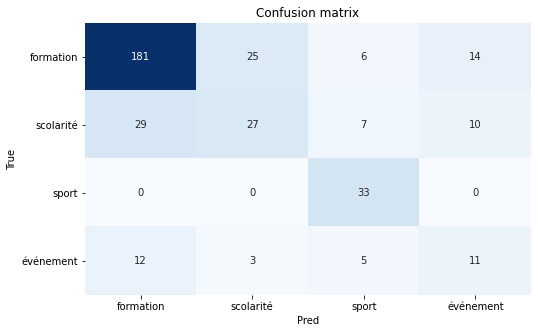

In [239]:
#evaluation for cosine similarity
import sklearn.metrics as metrics
import seaborn as sns
emails_v=emails_p[emails_p["is_target"]==0]
predicted=emails_v["cosine similarity"]
y=emails_v["acual category"]
classes = np.unique(y)
y_test_array = pd.get_dummies(y, drop_first=False).values
accuracy = metrics.accuracy_score(y, predicted)
# auc = metrics.roc_auc_score(y_test, predicted_prob, multi_class="ovr")
print("Accuracy:",  round(accuracy,2))
# print("Auc:", round(auc,2))
print("Detail:")
print(metrics.classification_report(y, predicted))
## Plot confusion matrix
cm = metrics.confusion_matrix(y, predicted)
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

Accuracy: 0.67
Detail:
              precision    recall  f1-score   support

   formation       0.82      0.76      0.79       226
   scolarité       0.49      0.37      0.42        73
       sport       0.65      1.00      0.79        33
   événement       0.23      0.35      0.28        31

    accuracy                           0.67       363
   macro avg       0.55      0.62      0.57       363
weighted avg       0.69      0.67      0.67       363



(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, 'formation'),
  Text(0, 1.5, 'scolarité'),
  Text(0, 2.5, 'sport'),
  Text(0, 3.5, 'événement')])

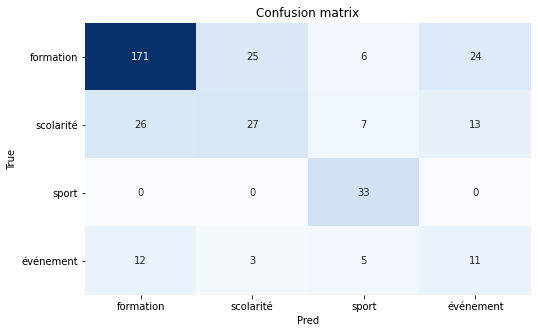

In [241]:
#evaluation for euclidean distance
import sklearn.metrics as metrics
import seaborn as sns
emails_v=emails_p[emails_p["is_target"]==0]
predicted=emails_v["euclidean distance"]
y=emails_v["acual category"]
classes = np.unique(y)
y_test_array = pd.get_dummies(y, drop_first=False).values
accuracy = metrics.accuracy_score(y, predicted)
# auc = metrics.roc_auc_score(y_test, predicted_prob, multi_class="ovr")
print("Accuracy:",  round(accuracy,2))
# print("Auc:", round(auc,2))
print("Detail:")
print(metrics.classification_report(y, predicted))
## Plot confusion matrix
cm = metrics.confusion_matrix(y, predicted)
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

# Semantic similarity

In [242]:
#calculate similarity using spacy
emails_p['simantic similarity']=""
for index, row in emails_p['text'].iteritems():
    if(emails_p["is_target"][index] == 0):
        doc=nlp(row)
        similarities = {'formation':doc.similarity(nlp("formation")), 'scolarité':doc.similarity(nlp("scolarité")), 'événement': doc.similarity(nlp("événement")), 'sport':doc.similarity(nlp("sport"))}
        emails_p['simantic similarity'][index]= max(similarities.items(), key=operator.itemgetter(1))[0]

Accuracy: 0.53
Detail:
              precision    recall  f1-score   support

   formation       0.68      0.83      0.75       226
   scolarité       0.00      0.00      0.00        73
       sport       0.00      0.00      0.00        33
   événement       0.05      0.13      0.07        31

    accuracy                           0.53       363
   macro avg       0.18      0.24      0.20       363
weighted avg       0.43      0.53      0.47       363



(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, 'formation'),
  Text(0, 1.5, 'scolarité'),
  Text(0, 2.5, 'sport'),
  Text(0, 3.5, 'événement')])

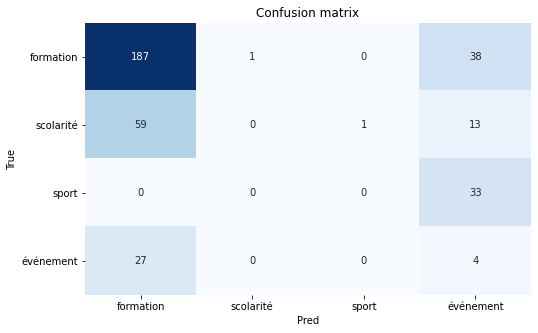

In [243]:
#evaluation for euclidean distance
import sklearn.metrics as metrics
import seaborn as sns
emails_v=emails_p[emails_p["is_target"]==0]
predicted=emails_v["simantic similarity"]
y=emails_v["acual category"]
classes = np.unique(y)
y_test_array = pd.get_dummies(y, drop_first=False).values
accuracy = metrics.accuracy_score(y, predicted)
# auc = metrics.roc_auc_score(y_test, predicted_prob, multi_class="ovr")
print("Accuracy:",  round(accuracy,2))
# print("Auc:", round(auc,2))
print("Detail:")
print(metrics.classification_report(y, predicted))
## Plot confusion matrix
cm = metrics.confusion_matrix(y, predicted)
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)